In [1]:
import tensorflow as tf 
import pandas as pd


In [2]:
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [5]:
timesteps = bitcoin_prices.index.to_numpy()
prices    = bitcoin_prices["Price"].to_numpy()

timesteps, prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
        '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  123.65499   ,   125.455     ,   108.58483   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]))

In [6]:
bitcoin_prices["Price"] = bitcoin_prices["Price"]/bitcoin_prices["Price"].max()

In [7]:
bitcoin_prices["Price"]

Date
2013-10-01    0.001952
2013-10-02    0.001980
2013-10-03    0.001714
2013-10-04    0.001873
2013-10-05    0.001915
                ...   
2021-05-14    0.785583
2021-05-15    0.789822
2021-05-16    0.755928
2021-05-17    0.719920
2021-05-18    0.681084
Name: Price, Length: 2787, dtype: float64

In [8]:
HORIZON = 1
WINDOW_SIZE = 7

bitcoin_prices_windowed = bitcoin_prices.copy()


In [9]:
for i in range(WINDOW_SIZE):

    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,0.001952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,0.001980,0.001952,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,0.001714,0.001980,0.001952,NaN,NaN,NaN,NaN,NaN
2013-10-04,0.001873,0.001714,0.001980,0.001952,NaN,NaN,NaN,NaN
2013-10-05,0.001915,0.001873,0.001714,0.001980,0.001952,NaN,NaN,NaN


In [10]:
import numpy as np


X = bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)


X.head()

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,
2013-10-08,0.001923,0.001905,0.001915,0.001873,0.001714,0.001980,0.001952
2013-10-09,0.001942,0.001923,0.001905,0.001915,0.001873,0.001714,0.001980
2013-10-10,0.001958,0.001942,0.001923,0.001905,0.001915,0.001873,0.001714
2013-10-11,0.001988,0.001958,0.001942,0.001923,0.001905,0.001915,0.001873
2013-10-12,0.001978,0.001988,0.001958,0.001942,0.001923,0.001905,0.001915


In [11]:
split_size = int(0.8 * len(X))

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test   = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)


(2224, 2224, 556, 556)

In [12]:
X_train

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,
2013-10-08,0.001923,0.001905,0.001915,0.001873,0.001714,0.001980,0.001952
2013-10-09,0.001942,0.001923,0.001905,0.001915,0.001873,0.001714,0.001980
2013-10-10,0.001958,0.001942,0.001923,0.001905,0.001915,0.001873,0.001714
2013-10-11,0.001988,0.001958,0.001942,0.001923,0.001905,0.001915,0.001873
2013-10-12,0.001978,0.001988,0.001958,0.001942,0.001923,0.001905,0.001915
...,...,...,...,...,...,...,...
2019-11-05,0.145270,0.146667,0.145195,0.144150,0.145643,0.149269,0.149309
2019-11-06,0.147910,0.145270,0.146667,0.145195,0.144150,0.145643,0.149269
2019-11-07,0.147231,0.147910,0.145270,0.146667,0.145195,0.144150,0.145643


In [13]:
tf.random.set_seed(42)

inputs = tf.keras.Input(shape=(WINDOW_SIZE,),name="input_layer")

x = tf.keras.layers.Dense(128,kernel_initializer="he_normal",activation="relu")(inputs)

x = tf.keras.layers.Dense(128,kernel_initializer="he_normal",activation="relu")(x)

outputs = tf.keras.layers.Dense(HORIZON,activation="linear")(x)

model = tf.keras.Model(inputs, outputs,name="model")

model.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0,
    validation_data=(X_test, y_test),
    batch_size=128,

)

In [14]:
model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 3ms/step - loss: 0.0114 - mae: 0.0114


[0.011410816572606564, 0.011410816572606564]

In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [17]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [18]:
WINDOW_SIZE = 7
HORIZON = 1

bitcoin_prices_windowed = bitcoin_prices.copy()


In [19]:
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [20]:
X = bitcoin_prices_windowed.dropna().drop(["Price"],axis=1).to_numpy()

y = bitcoin_prices_windowed.dropna()["Price"].to_numpy()



In [21]:
features = tf.data.Dataset.from_tensor_slices(X)
labels   = tf.data.Dataset.from_tensor_slices(y)

data = tf.data.Dataset.zip((features,labels))

data = data.batch(1024).prefetch(tf.data.AUTOTUNE)

data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [22]:
inputs = tf.keras.Input(shape=(WINDOW_SIZE,))

x = tf.keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal")(inputs)

x = tf.keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal")(x)

outputs = tf.keras.layers.Dense(HORIZON,activation="linear")(x)

model2 = tf.keras.Model(inputs, outputs)

model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history = model2.fit(
    data,
    epochs=100,
    verbose=1,
    callbacks = [tf.keras.callbacks.ModelCheckpoint(
        monitor="mae",
        save_best_only=True,
        save_weights_only=True,
        save_freq="epoch",
        filepath="D:/Me-ScriptsnShit/TensorFlow/Time Series/",
        verbose=1
        )]

)


Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 595.5912 - mae: 595.5912
Epoch 1: mae improved from inf to 3326.40723, saving model to D:/Me-ScriptsnShit/TensorFlow/Time Series\
3/3 [==============================] - 1s 264ms/step - loss: 3326.4072 - mae: 3326.4072
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 40.3196 - mae: 40.3196
Epoch 2: mae did not improve from 3326.40723
3/3 [==============================] - 0s 6ms/step - loss: 3743.9121 - mae: 3743.9121
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 246.6157 - mae: 246.6157
Epoch 3: mae improved from 3326.40723 to 2848.26465, saving model to D:/Me-ScriptsnShit/TensorFlow/Time Series\
3/3 [==============================] - 0s 113ms/step - loss: 2848.2646 - mae: 2848.2646
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 77.1493 - mae: 77.1493
Epoch 4: mae improved from 2848.26465 to 1049.62109, saving model to D:/Me-ScriptsnShit/TensorFlow/Time Series\


In [23]:
import matplotlib.pyplot as plt


<AxesSubplot:>

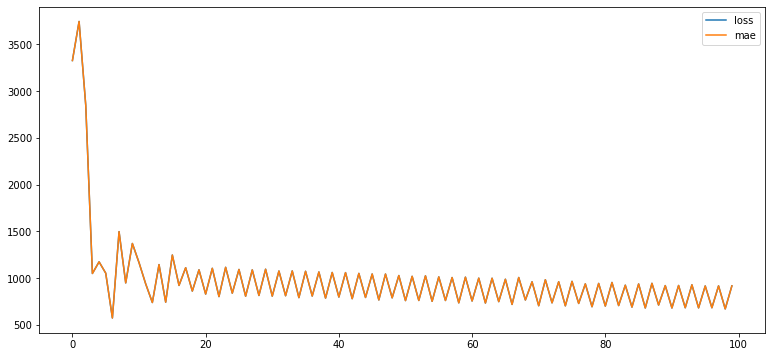

In [24]:
pd.DataFrame(history.history).plot(figsize=(13,6))

In [28]:
INTO_FUTURE=14

In [35]:
# 1. Create function to make predictions into the future

def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
    """  
    Make future forecasts into_future steps after values ends.

    Returns future forecasts as a list of floats.
    """

    # 2. Create an empty list for future forecasts/prepare data to forecast on 

    future_forecast = []
    last_window = values[-WINDOW_SIZE:]

    # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each

    for _ in range(INTO_FUTURE):

        # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecast)
        future_pred = model.predict(tf.expand_dims(last_window,axis=0))
        print(f"Predicting on:n\ {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

        # Append predictions to future_forecast

        future_forecast.append(tf.squeeze(future_pred).numpy())
        
        # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)

        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  
        
    return future_forecast

In [37]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [45]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [46]:
bitcoin_prices["Price"] = (bitcoin_prices["Price"] - bitcoin_prices["Price"].min()) / (bitcoin_prices["Price"].max() - bitcoin_prices["Price"].min())

In [47]:
bitcoin_prices

,Price
Date,
2013-10-01,0.000238
2013-10-02,0.000267
2013-10-03,0.000000
2013-10-04,0.000160
2013-10-05,0.000202
...,...
2021-05-14,0.785214
2021-05-15,0.789461
2021-05-16,0.755509


In [48]:
WINDOW_SIZE = 7
HORIZON     = 1


In [49]:
for i in range(WINDOW_SIZE):
    bitcoin_prices[f"Price+{i+1}"] = bitcoin_prices["Price"].shift(periods=i+1)

bitcoin_prices.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,0.000238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,0.000267,0.000238,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,0.000000,0.000267,0.000238,NaN,NaN,NaN,NaN,NaN
2013-10-04,0.000160,0.000000,0.000267,0.000238,NaN,NaN,NaN,NaN
2013-10-05,0.000202,0.000160,0.000000,0.000267,0.000238,NaN,NaN,NaN
2013-10-06,0.000191,0.000202,0.000160,0.000000,0.000267,0.000238,NaN,NaN
2013-10-07,0.000209,0.000191,0.000202,0.000160,0.000000,0.000267,0.000238,NaN
2013-10-08,0.000228,0.000209,0.000191,0.000202,0.000160,0.000000,0.000267,0.000238
2013-10-09,0.000245,0.000228,0.000209,0.000191,0.000202,0.000160,0.000000,0.000267


In [52]:
X = bitcoin_prices.dropna().drop(["Price"],axis=1).to_numpy()
y = bitcoin_prices.dropna()["Price"].to_numpy()

In [54]:
features = tf.data.Dataset.from_tensor_slices(X)
labels   = tf.data.Dataset.from_tensor_slices(y)

data = tf.data.Dataset.zip((features,labels))

data = data.batch(1024).prefetch(tf.data.AUTOTUNE)

data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [57]:
inputs = tf.keras.Input(shape=(WINDOW_SIZE,),name="input_layer")

x = tf.keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal",name="Dense_1")(inputs)

x = tf.keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal",name="Dense_2")(x)

outputs = tf.keras.layers.Dense(HORIZON,activation="linear",name="output_layer")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3")

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae","accuracy"]
)

history_3 = model_3.fit(
    data,
    epochs=100,
    verbose=1

)

Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0295 - mae: 0.0295 - accuracy: 3.5971e-04
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0632 - mae: 0.0632 - accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 0.0203 - mae: 0.0203 - accuracy: 3.5971e-04
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0679 - mae: 0.0679 - accuracy: 3.5971e-04
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0427 - mae: 0.0427 - accuracy: 3.5971e-04
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0358 - mae: 0.0358 - accuracy: 3.5971e-04
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0276 - mae: 0.0276 - accuracy: 3.5971e-04
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0398 - mae: 0.0398 - accuracy: 3.5971e-04
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0333 -

In [56]:
model_3.evaluate(data)

3/3 [==============================] - 0s 5ms/step - loss: 0.0037 - mae: 0.0037 - accuracy: 3.5971e-04    


[0.00373723148368299, 0.00373723148368299, 0.0003597122267819941]

In [58]:
3.5971e-04

0.00035971

In [60]:
model2.trainable = True


In [61]:
base_model = model2

base_model.trainable = False

inputs = tf.keras.Input(shape=(WINDOW_SIZE,))

x = base_model(inputs,training=False)

x = tf.keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal")(x)

outputs = tf.keras.layers.Dense(HORIZON,activation="linear")(x)

model_4 = tf.keras.Model(inputs, outputs)

model_4.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

model_4.fit(
    data,
    epochs=100
)




Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1586 - mae: 0.1586
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 0.1117 - mae: 0.1117
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0951 - mae: 0.0951
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0838 - mae: 0.0838
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0769 - mae: 0.0769
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0743 - mae: 0.0743
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0751 - mae: 0.0751
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0752 - mae: 0.0752
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0724 - mae: 0.0724
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0668 - mae: 0.0668
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0603 

In [62]:
import tensorflow as tf 
import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [65]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [66]:
WINDOW_SIZE = 7
HORIZON     = 1

In [67]:
for i in range(WINDOW_SIZE):
    bitcoin_prices[f"Price+{i+1}"] = bitcoin_prices["Price"].shift(periods=i+1)

bitcoin_prices

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [68]:
X = bitcoin_prices.dropna().drop("Price",axis=1).to_numpy()
y = bitcoin_prices.dropna()["Price"].to_numpy()

In [69]:
features = tf.data.Dataset.from_tensor_slices(X)
labels   = tf.data.Dataset.from_tensor_slices(y)

data = tf.data.Dataset.zip((features,labels))

data = data.batch(1024).prefetch(tf.data.AUTOTUNE)

In [74]:
base_model = model_3
base_model.trainable = False

inputs = tf.keras.Input(shape=(WINDOW_SIZE,))

x = base_model(inputs,training=False)
x = tf.keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal")(X)

outputs = tf.keras.layers.Dense(HORIZON,activation="linear")(x)


model_5 = tf.keras.Model(inputs, outputs)

model_5.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

model_5.fit(
    data,
    epochs=50
)

ValueError: Output tensors of a Functional model must be the output of a TensorFlow `Layer` (thus holding past layer metadata). Found: [[   40.912155]
 [   38.015602]
 [   24.364288]
 ...
 [21425.844   ]
 [19749.918   ]
 [20092.      ]]